
# without scaling 240

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [2]:
df=pd.read_csv('Train_Kaggle.csv')
df.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [3]:
#temp=df['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#df['Month']=temp
#df['Year-Month'] = df['Year'].astype(str)+ ' - ' + df['Month']
#df.head()

In [4]:
#train_d.drop(['Year','Month'], axis = 1, inplace = True)
#train_d=train_d[['Year- Month','ProductCategory','Sales(In ThousandDollars)']]
#train_d

In [5]:
for each in df[df['Sales(In ThousandDollars)'].isnull()].index.values.tolist():
    df.loc[each,'Sales(In ThousandDollars)']=0.5*(df.loc[each-3,'Sales(In ThousandDollars)']+df.loc[each+3,'Sales(In ThousandDollars)'])
df.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [6]:
df_1=df[df['ProductCategory']=='WomenClothing'].reset_index()
df_2=df[df['ProductCategory']=='MenClothing'].reset_index()
df_3=df[df['ProductCategory']=='OtherClothing'].reset_index()

In [7]:
macro_d=pd.ExcelFile('MacroEconomicData.xlsx')
macro_df = macro_d.parse("Sheet1")

#macro_df=macro_df
macro_df_1=pd.concat([macro_df,df_1[['Year','Month','Sales(In ThousandDollars)']]],axis=1)
macro_df_2=pd.concat([macro_df,df_2[['Year','Month','Sales(In ThousandDollars)']]],axis=1)
macro_df_3=pd.concat([macro_df,df_3[['Year','Month','Sales(In ThousandDollars)']]],axis=1)

In [8]:
macro_rest=macro_df_2[72:]

In [9]:
macro_df_1=macro_df_1.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
macro_df_2=macro_df_2.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
macro_df_3=macro_df_3.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
macro_rest=macro_rest.drop(['Monthly Nominal GDP Index (inMillion$)','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)

In [10]:
#macro_df['PartyInPower'].unique()
list(macro_df_1)

['Monthly Real GDP Index (inMillion$)',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'yieldperharvested acre',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'Year',
 'Month',
 'Sales(In ThousandDollars)']

In [11]:
#macro_df[macro_df['CPI'].isnan()]
macro_rest

,Year-Month,Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month,Sales(In ThousandDollars)
72,2015 - Jan,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.450,NaN,NaN,NaN
73,2015 - Feb,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.200,NaN,NaN,NaN
74,2015 - Mar,16329.523792,259.647,5.4,11.98,9.85,25.04,69.35,-0.70,10.845,9.518,781,15.496,3.625,10.250,NaN,NaN,NaN
75,2015 - Apr,16427.136671,259.959,5.4,11.98,9.85,24.94,71.70,3.39,10.845,9.518,794,15.735,3.625,10.250,NaN,NaN,NaN
76,2015 - May,16434.482376,261.066,5.5,12.04,9.69,24.88,72.86,1.62,10.845,9.157,826,15.753,3.625,10.300,NaN,NaN,NaN
77,2015 - Jun,16521.301886,261.512,5.3,12.04,9.69,24.77,72.35,-0.70,9.399,8.451,797,14.030,3.775,10.150,NaN,NaN,NaN
78,2015 - Jul,16475.999854,261.199,5.2,12.04,9.69,24.83,72.35,0.00,8.850,8.353,807,14.035,3.725,10.250,NaN,NaN,NaN
79,2015 - Aug,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,-0.73,8.750,7.749,784,12.650,3.675,9.475,NaN,NaN,NaN
80,2015 - Sep,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,-4.29,8.398,8.012,777,12.977,3.675,9.700,NaN,NaN,NaN
81,2015 - Oct,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,0.42,8.398,8.012,772,12.887,3.675,9.700,NaN,NaN,NaN


In [12]:
# Remove non important features.
macro_df_1=macro_df_1.drop(['Monthly Real GDP Index (inMillion$)','Cotton Monthly Price - US cents per Pound(lbs)','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)'],axis=1)
macro_df_2=macro_df_2.drop(['Monthly Real GDP Index (inMillion$)','Cotton Monthly Price - US cents per Pound(lbs)','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)'],axis=1)
macro_df_3=macro_df_3.drop(['Monthly Real GDP Index (inMillion$)','Cotton Monthly Price - US cents per Pound(lbs)','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)'],axis=1)
macro_rest=macro_rest.drop(['Monthly Real GDP Index (inMillion$)','Cotton Monthly Price - US cents per Pound(lbs)','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)'],axis=1)



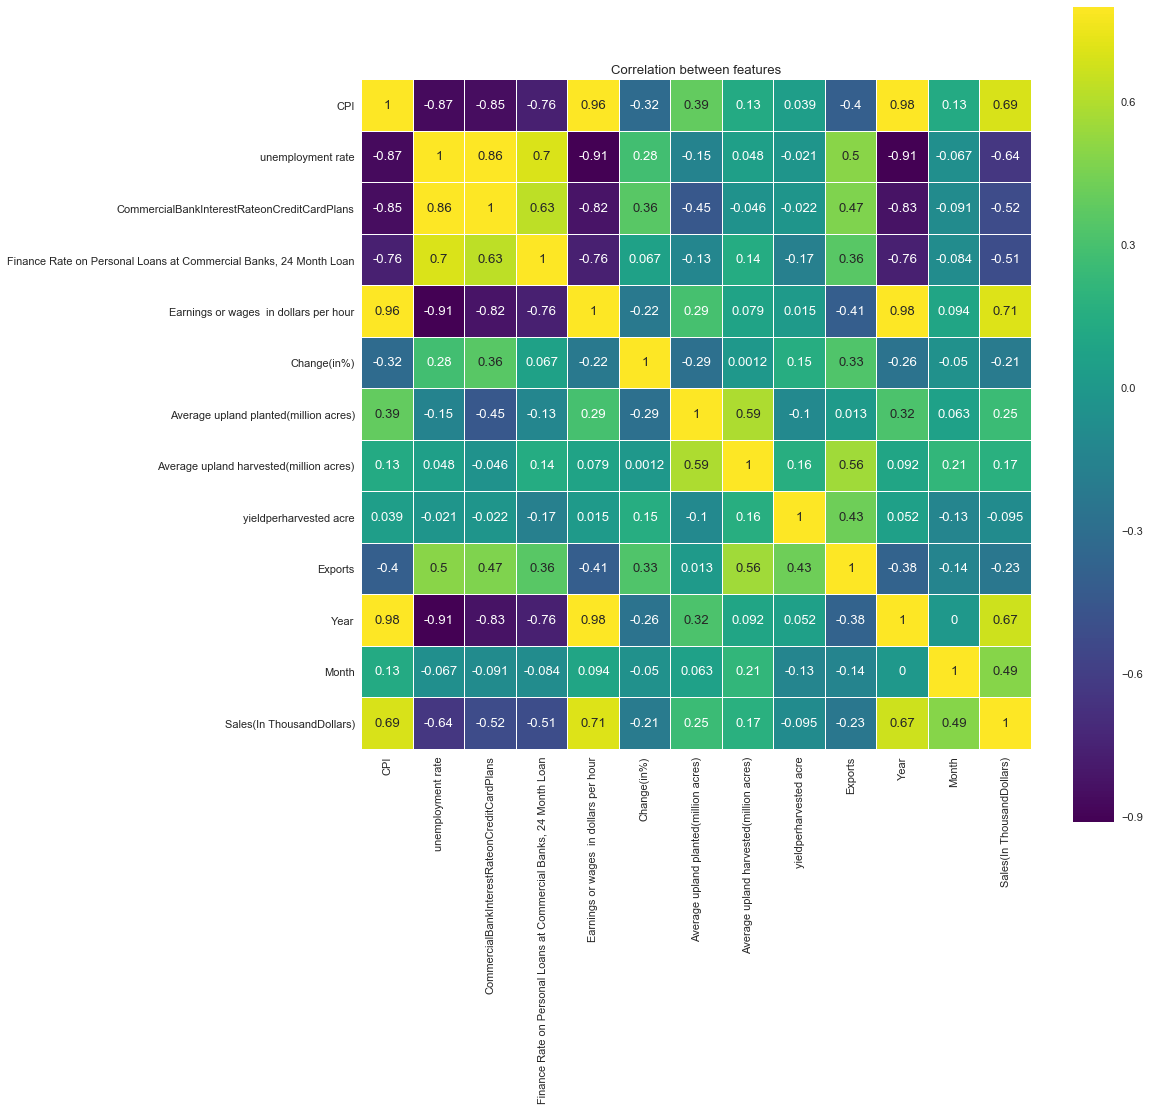

In [13]:
# Heat Map macro df_1
corrMatrix=macro_df_1[list(macro_df_1)].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [14]:
list(macro_df_1)

['CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'yieldperharvested acre',
 'Exports',
 'Year',
 'Month',
 'Sales(In ThousandDollars)']

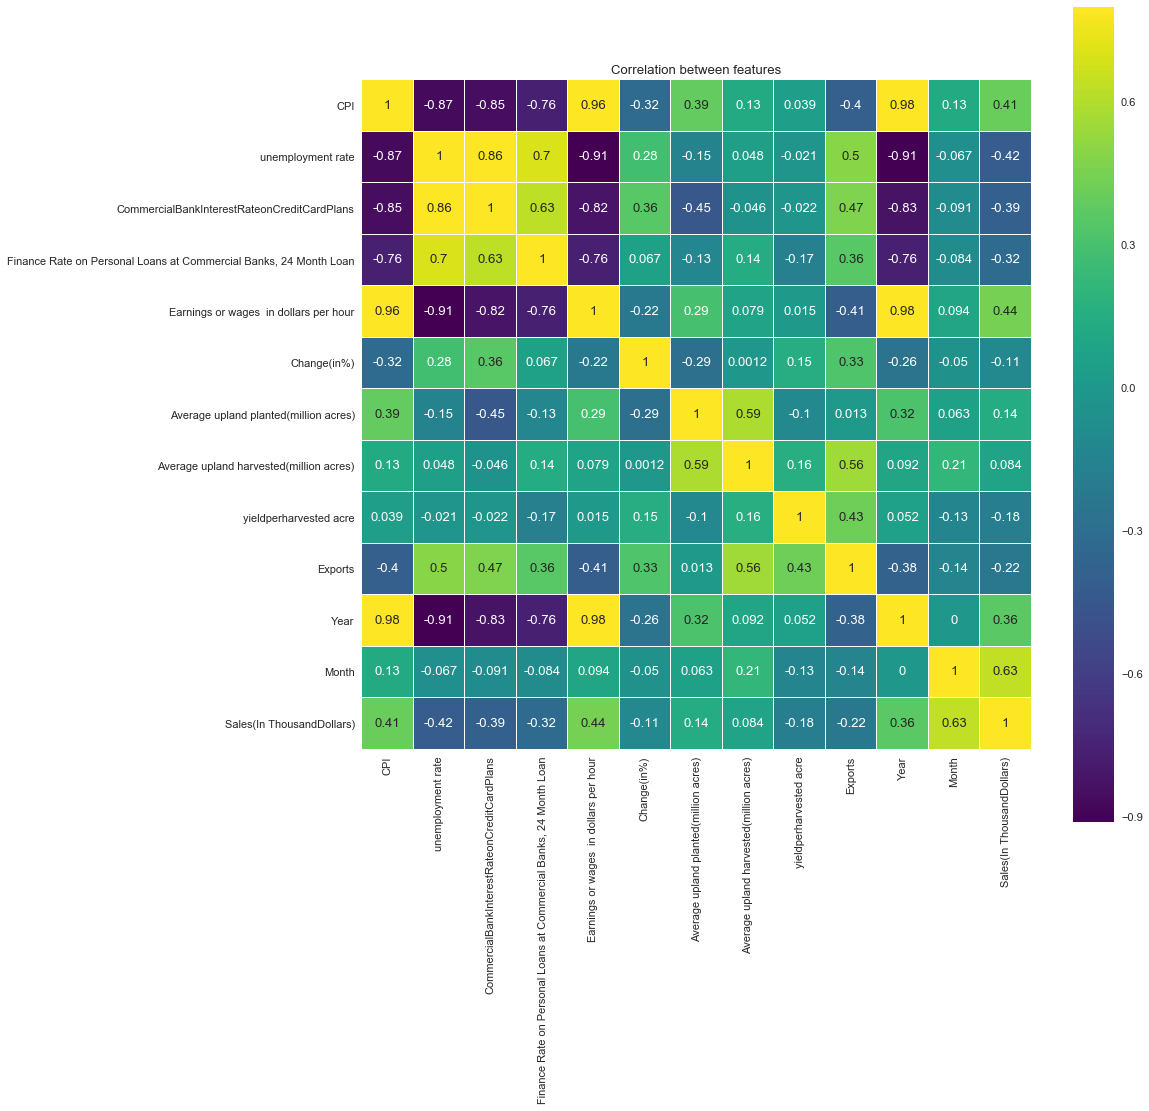

In [15]:
corrMatrix=macro_df_2[list(macro_df_2)].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

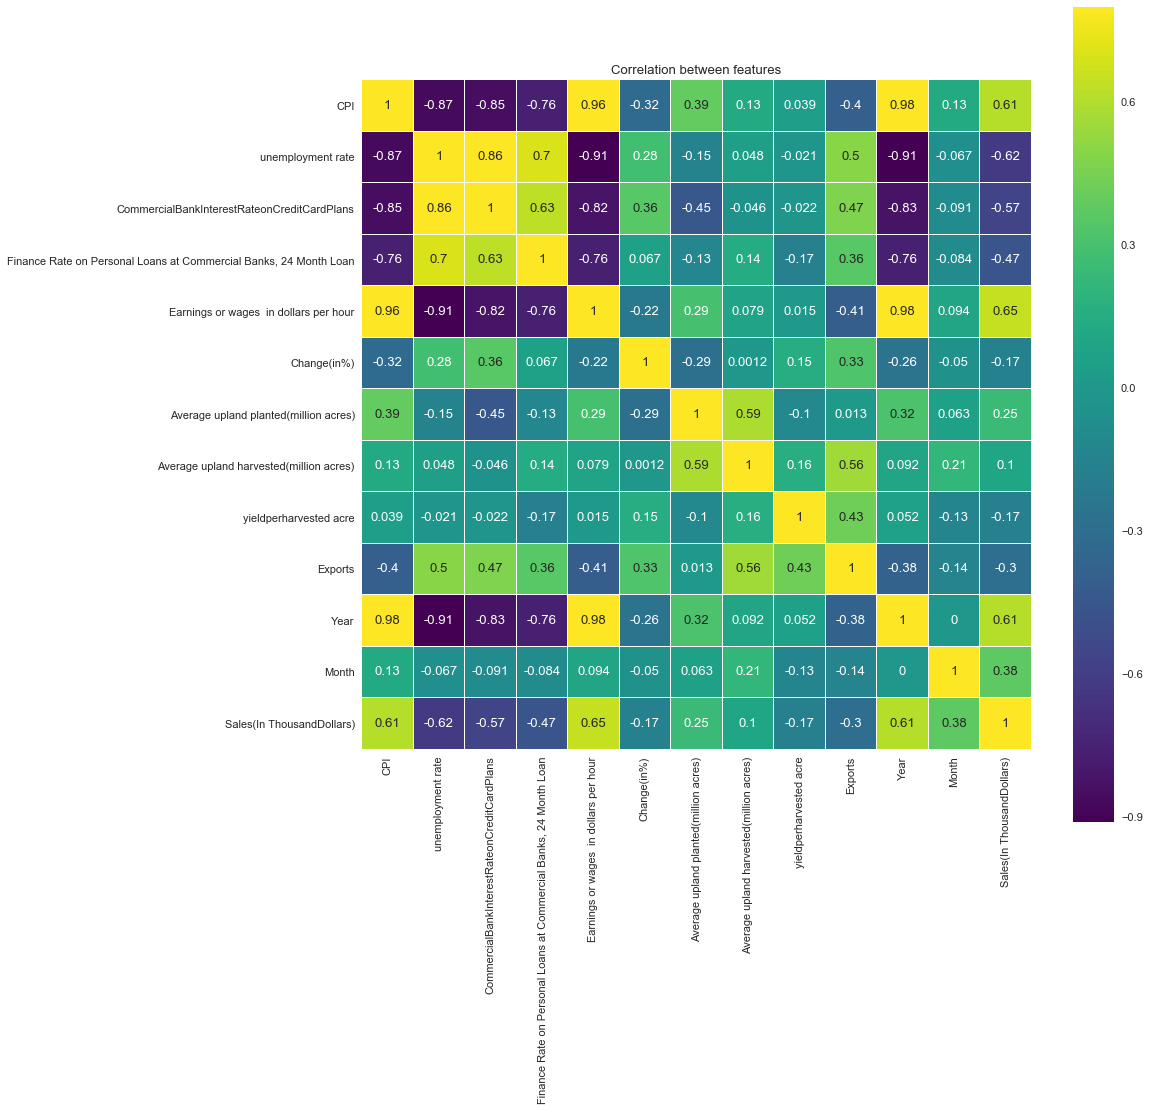

In [16]:
corrMatrix=macro_df_3[list(macro_df_3)].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

y_1=macro_df_1['Sales(In ThousandDollars)']
mean_1=y_1.mean()
std_1=y_1.std()
y_1=preprocessing.scale(y_1)

x_1=macro_df_1.drop(['Sales(In ThousandDollars)'],axis=1)
#x_1= preprocessing.normalize(x_1)
x_1=preprocessing.scale(x_1)
lr_1=SVR(kernel='rbf', C=1e3, gamma=0.1)
lr_1.fit(x_1,y_1)

In [17]:
x_1=[]
y_1=[]
lr_1=[]
m_1=[]
std_1=[]
for each in range(12):
    x_1.append('x'+str(each))
    y_1.append('y'+str(each))
    lr_1.append('lr'+str(each))
    m_1.append('m'+str(each))
    std_1.append('std'+str(each))
for i in range(12):
    #print(i)
    y_1[i]=macro_df_1[macro_df_1['Month']== i+1]['Sales(In ThousandDollars)']
    #macro_df_1=macro_df_1.drop(['Sales(In ThousandDollars)'],axis=1)
    x_1[i]=macro_df_1[macro_df_1['Month']== i+1]
    x_1[i]=x_1[i].drop(['Sales(In ThousandDollars)'],axis=1)
    #print(x[i].shape)
    m_1[i]=y_1[i].mean()
    std_1[i]=y_1[i].std()
    lr_1[i]=LinearRegression()
    x_1[i]=preprocessing.scale(x_1[i])
    y_1[i]=preprocessing.scale(y_1[i])
    lr_1[i].fit(x_1[i],y_1[i])

x_2=[]
y_2=[]
lr_2=[]
m_2=[]
std_2=[]
for each in range(12):
    x_2.append('x'+str(each))
    y_2.append('y'+str(each))
    lr_2.append('lr'+str(each))
    m_2.append('m'+str(each))
    std_2.append('std'+str(each))

for i in range(12):
    #print(i)
    x_2[i]=macro_df_2[macro_df_2['Month']== i+1]
    y_2[i]=macro_df_2[macro_df_2['Month']== i+1]['Sales(In ThousandDollars)']
    #print(x[i].shape)
    x_2[i]=x_2[i].drop(['Sales(In ThousandDollars)'],axis=1)
    m_2[i]=y_2[i].mean()
    std_2[i]=y_2[i].std()
    x_2[i]=preprocessing.scale(x_2[i])
    y_2[i]=preprocessing.scale(y_2[i])
    lr_2[i]=LinearRegression()
    lr_2[i].fit(x_2[i],y_2[i])
    
x_3=[]
y_3=[]
lr_3=[]
m_3=[]
std_3=[]
for each in range(12):
    x_3.append('x'+str(each))
    y_3.append('y'+str(each))
    lr_3.append('lr'+str(each))
    m_3.append('m'+str(each))
    std_3.append('std'+str(each))

for i in range(12):
   # print(i)
    x_3[i]=macro_df_3[macro_df_3['Month']== i+1]
    y_3[i]=macro_df_3[macro_df_3['Month']== i+1]['Sales(In ThousandDollars)']
    #print(x[i].shape)
    x_3[i]=x_3[i].drop(['Sales(In ThousandDollars)'],axis=1)
    m_3[i]=y_3[i].mean()
    std_3[i]=y_3[i].std()
    x_3[i]=preprocessing.scale(x_3[i])
    y_3[i]=preprocessing.scale(y_3[i])
    lr_3[i]=LinearRegression()
    lr_3[i].fit(x_3[i],y_3[i])


In [18]:
#x_1[0].shape,x_2[0].shape,x_3[0].shape,y_1[0].shape

In [19]:
testdata=pd.read_csv('Test_Kaggle.csv')

testdata.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,WomenClothing,NaN
1,2015,1,MenClothing,NaN
2,2015,1,OtherClothing,NaN
3,2015,2,WomenClothing,NaN
4,2015,2,MenClothing,NaN


In [20]:
macro_rest=macro_rest.reset_index(drop=True)[:12]


In [21]:
macro_rest=macro_rest.drop(['Year-Month','Sales(In ThousandDollars)'],axis=1)

In [22]:
macro_rest['Month']=[1,2,3,4,5,6,7,8,9,10,11,12]
macro_rest['Year']=2015

macro_rest

,CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Exports,Year,Month
0,258.376,5.7,11.99,10.47,24.88,-1.39,10.845,9.518,760,9.450,2015,1
1,259.240,5.5,11.98,9.85,25.05,3.70,10.845,9.518,781,10.200,2015,2
2,259.647,5.4,11.98,9.85,25.04,-0.70,10.845,9.518,781,10.250,2015,3
3,259.959,5.4,11.98,9.85,24.94,3.39,10.845,9.518,794,10.250,2015,4
4,261.066,5.5,12.04,9.69,24.88,1.62,10.845,9.157,826,10.300,2015,5
5,261.512,5.3,12.04,9.69,24.77,-0.70,9.399,8.451,797,10.150,2015,6
6,261.199,5.2,12.04,9.69,24.83,0.00,8.850,8.353,807,10.250,2015,7
7,261.347,5.1,12.10,9.80,25.04,-0.73,8.750,7.749,784,9.475,2015,8
8,261.887,5.0,12.10,9.80,25.05,-4.29,8.398,8.012,777,9.700,2015,9
9,261.515,5.0,12.10,9.80,25.14,0.42,8.398,8.012,772,9.700,2015,10


In [23]:
list(x_1[0])

[array([-1.44211644, -0.46232073, -0.68691316,  1.46517935, -1.53050962,
         0.03957802, -0.90342421, -0.90922656,  0.04181896,  0.04532307,
        -1.46385011,  0.        ]),
 array([-0.82700197,  1.51905383,  1.48447006,  0.91573709, -0.94462799,
        -1.65436124, -1.05944231, -0.91522994, -1.08729283, -0.58645308,
        -0.87831007,  0.        ]),
 array([-0.421676  ,  0.82557273,  1.2631826 ,  0.32050798, -0.11675177,
         1.27968932, -0.10545667,  1.6173398 ,  0.5122822 ,  2.09447528,
        -0.29277002,  0.        ]),
 array([ 0.31661604,  0.03302291, -0.23050777, -1.0073108 ,  0.39271051,
         1.04749827,  1.87564807,  0.70739856, -1.36957078, -0.61392161,
         0.29277002,  0.        ]),
 array([ 0.92256124, -0.26418327, -0.89437016, -0.36629484,  0.80028034,
        -0.72559704,  0.6031255 ,  0.48956154,  1.61002977,  0.00412028,
         0.87831007,  0.        ]),
 array([ 1.45161713, -1.65114547, -0.93586156, -1.32781878,  1.39889853,
         0.013192

In [24]:
pred_1=[]
pred_2=[]
pred_3=[]
macro_rest=preprocessing.scale(macro_rest)
for i in range(12):
    pred_1.append((lr_1[i].predict(macro_rest[i].reshape(1, -1))*std_1[i])+m_1[i])
    pred_2.append((lr_2[i].predict(macro_rest[i].reshape(1, -1))*std_2[i])+m_2[i])
    pred_3.append((lr_3[i].predict(macro_rest[i].reshape(1, -1))*std_3[i])+m_3[i])
pred_f=[]
for j in range(12):
    pred_f.append(pred_1[j])
    pred_f.append(pred_2[j]) 
    pred_f.append(pred_3[j])

In [25]:
fil=open('subv_linear_macrod_scale.csv','w')
fil.write('Year,Sales(In ThousandDollars)\n')
for i in range(len(pred_f)-1):
    fil.write('%d,%d\n'%(i+1,pred_f[i]))
    #print('%d,%d\n'%(i+1,pred_f[i]))
fil.write('%d,%d'%(i+2,pred_f[i+1]))
fil.close()